In [1]:
import pandas as pd
import numpy as np

dataset_path = "/content/drive/MyDrive/Pengantar Data Science/Tugas 4/Salinan KAG_energydata_complete.csv"
df = pd.read_csv(dataset_path)

In [2]:
from IPython.display import display

display(df.head(10))
df.shape
list(df.columns)
df.isnull().sum()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [3]:
df2 = df.copy()
df2['date'] = pd.to_datetime(df2['date'])
df2['hour'] = df2['date'].dt.hour
df2['dayofweek'] = df2['date'].dt.dayofweek
df2['month'] = df2['date'].dt.month

In [4]:
drop_cols = ['date', 'rv1', 'rv2']
for c in drop_cols:
    if c in df2.columns:
        df2 = df2.drop(columns=c)

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
y = df2['Appliances']
X = df2.drop(columns=['Appliances'])
X = X.select_dtypes(include=[np.number])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [10]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)

    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

In [11]:
metrics_lr = regression_metrics(y_test, y_pred_lr)
metrics_rf = regression_metrics(y_test, y_pred_rf)

In [12]:
metrics_table = pd.DataFrame([metrics_lr, metrics_rf], index=['LinearRegression', 'RandomForest'])
display("Model evaluation metrics (test set)", metrics_table.reset_index())

'Model evaluation metrics (test set)'

,index,MAE,RMSE,R2
0,LinearRegression,52.552964,91.089606,0.170856
1,RandomForest,31.007221,66.394349,0.559491


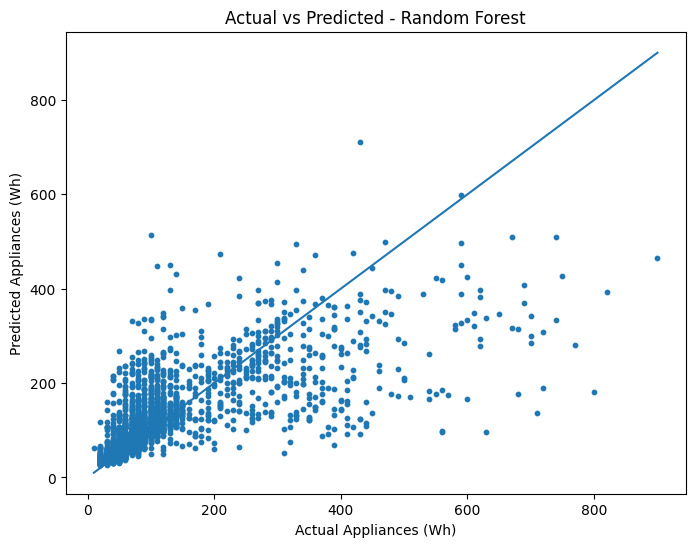

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, s=10)
minv = min(y_test.min(), y_pred_rf.min())
maxv = max(y_test.max(), y_pred_rf.max())
plt.plot([minv, maxv], [minv, maxv])
plt.xlabel("Actual Appliances (Wh)")
plt.ylabel("Predicted Appliances (Wh)")
plt.title("Actual vs Predicted - Random Forest")
plt.show()

In [14]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top10 = importances.head(10).reset_index()
top10.columns = ['feature', 'importance']
display("Top 10 feature importances (Random Forest)", top10)

'Top 10 feature importances (Random Forest)'

,feature,importance
0,hour,0.151519
1,T3,0.062379
2,RH_3,0.044962
3,Press_mm_hg,0.041485
4,RH_5,0.040255
5,T8,0.038679
6,RH_2,0.038454
7,Tdewpoint,0.034288
8,RH_1,0.034271
9,RH_4,0.033291


In [15]:
pred_compare = pd.DataFrame({
    "Actual": y_test.values.flatten(),
    "Pred_RF": y_pred_rf,
    "Pred_LR": y_pred_lr
}, index=y_test.index).reset_index(drop=True).head(10)
display("Sample predictions (first 10 rows of test set)", pred_compare)

'Sample predictions (first 10 rows of test set)'

,Actual,Pred_RF,Pred_LR
0,40,52.9,28.310296
1,90,104.8,261.167953
2,50,45.3,43.623518
3,50,64.8,113.735702
4,70,71.8,39.882848
5,120,117.6,196.291393
6,120,111.3,88.914959
7,70,107.3,178.756501
8,50,51.8,76.937394
9,70,101.2,145.387578
